In [2]:
import numpy as np
from sys import path
path.append('../src')
from src.samplers import WienerRainbowPutOptionSampler, GeometricBrownianMotionPutSampler
from src.american_monte_carlo import AmericanMonteCarlo
from src.basis_functions import PolynomialTransformer

In [3]:
%load_ext autoreload
%autoreload 2

# Rainbow Wiener 2-dimensional

In [4]:
amc = AmericanMonteCarlo(
    sampler=WienerRainbowPutOptionSampler(
        cnt_trajectories=1_000_0, # кол-во траекторий
        cnt_times=30, # кол-во временных точек
        t=1,
        time_grid = None,
        seed = 345,
        sigmas = [1., 1.], # волатильность цен базовых активов
        strike=0.
    ),
    basis_functions_transformer=PolynomialTransformer(),
    regularization_alpha=1e-4
)

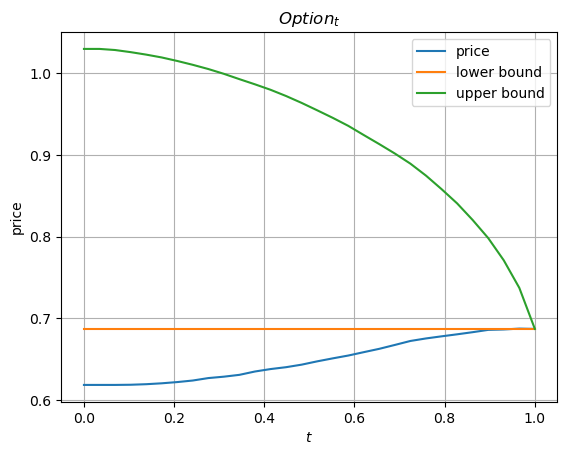

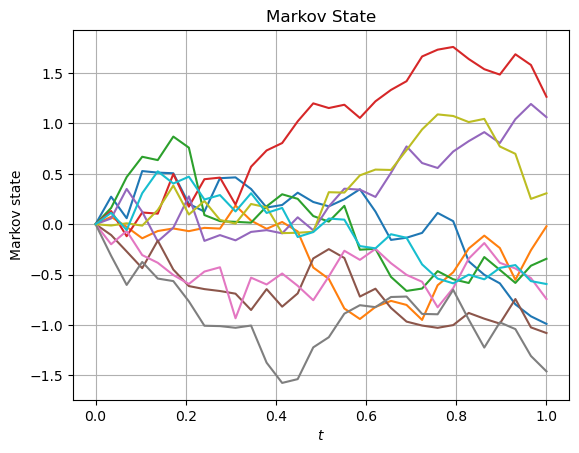

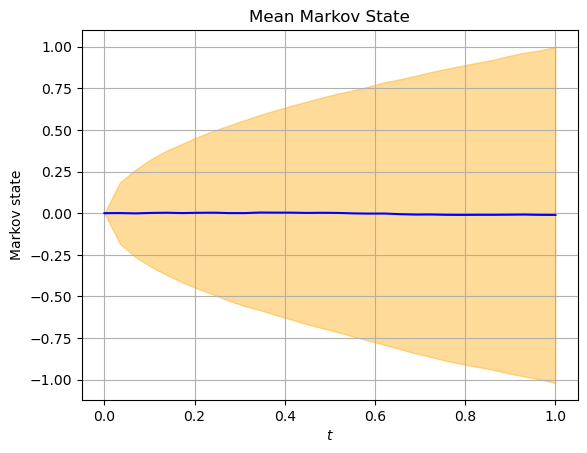

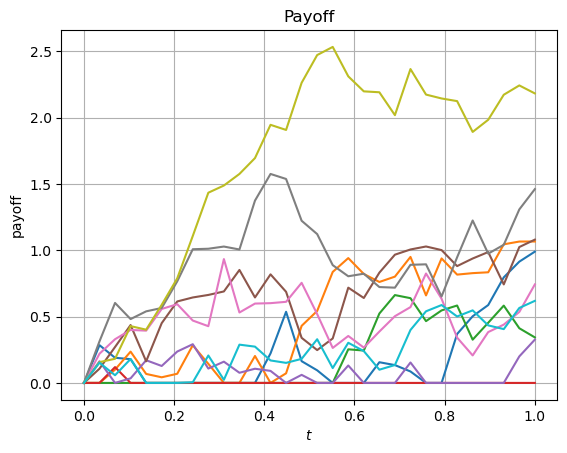

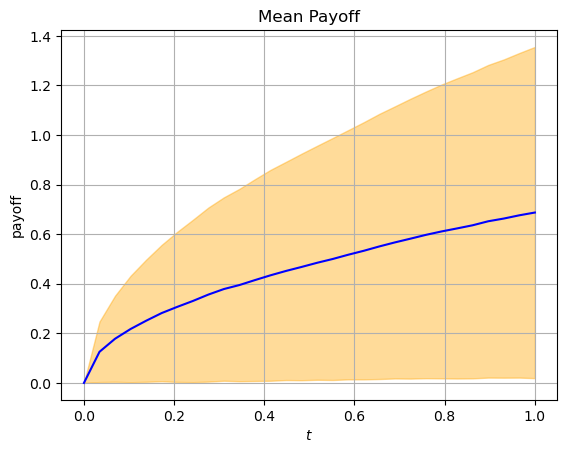

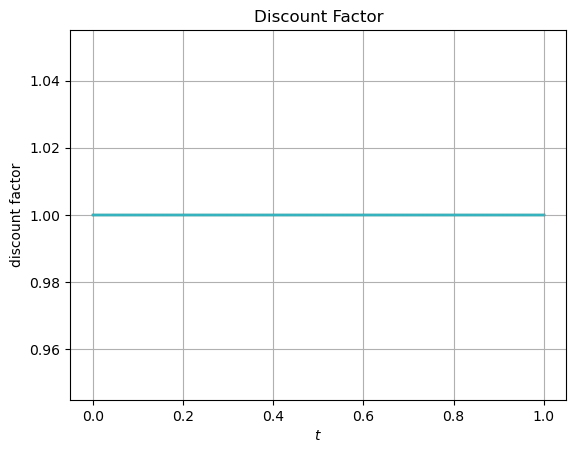

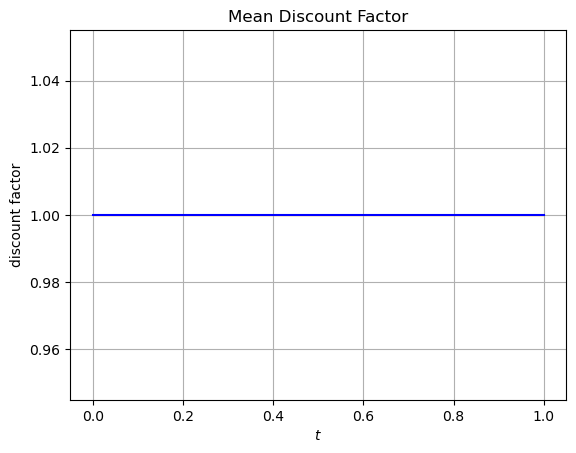

{'train': {'price': 0.6187016389549632,
  'upper_bound': 1.0296212076253415,
  'lower_bound': 0.6872088904349146,
  'std': 0.4305337580069289}}

In [5]:
amc.price(
    test=False,
    quiet=False
)

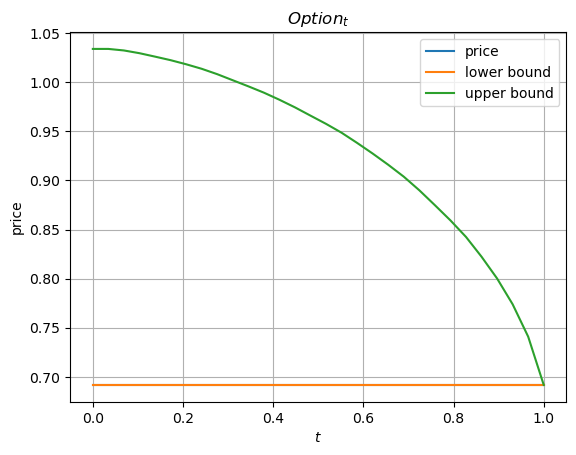

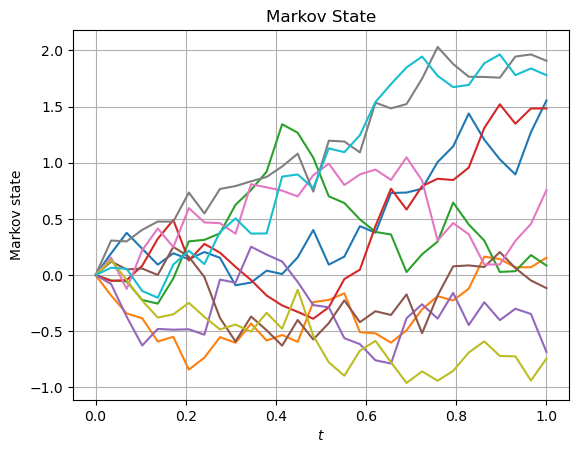

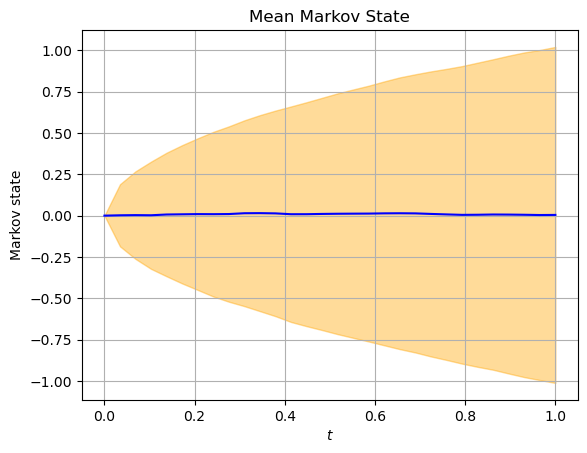

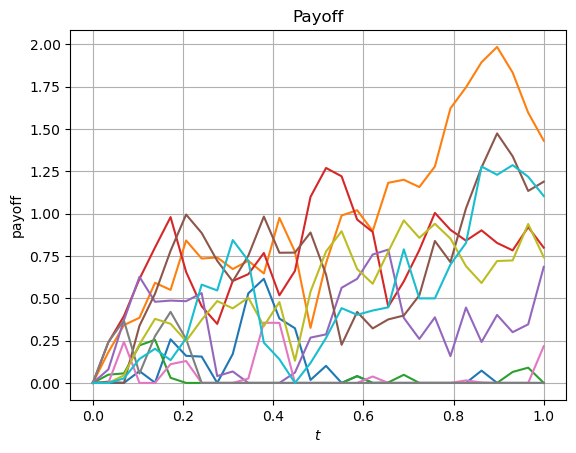

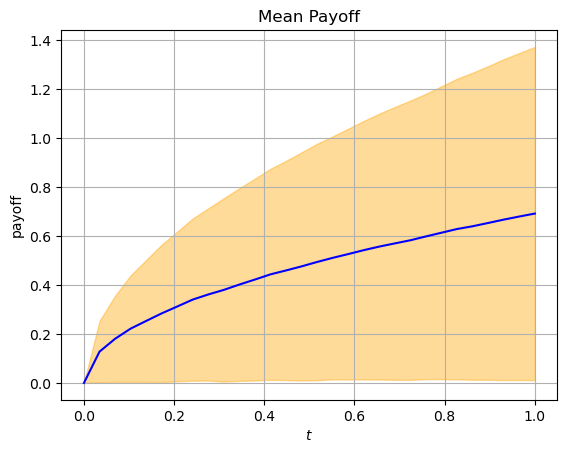

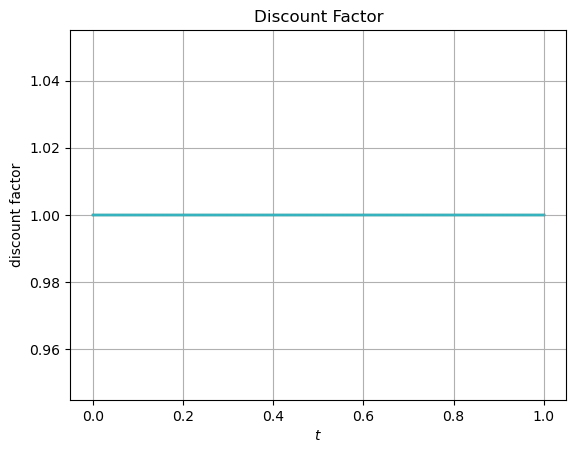

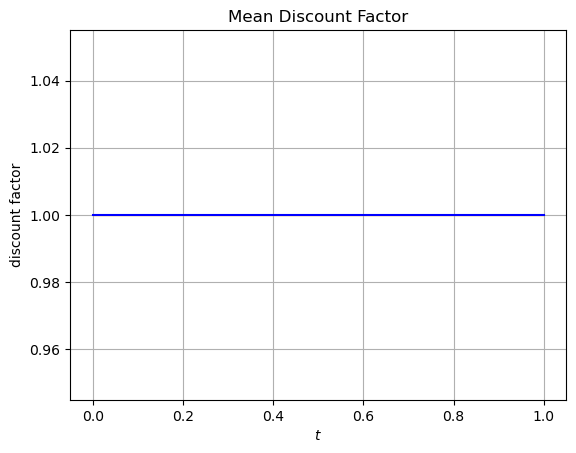

{'train': {'price': 0.6187016389549632,
  'upper_bound': 1.0296212076253415,
  'lower_bound': 0.6872088904349146,
  'std': 0.4305337580069289},
 'test': {'price': 0.6918045407867156,
  'upper_bound': 1.033863207227669,
  'lower_bound': 0.6918045407867149,
  'std': 0.6806605581496745}}

In [6]:
amc.price(
    test=True,
    quiet=False
)

# GBM put

In [7]:
amc = AmericanMonteCarlo(
    sampler=GeometricBrownianMotionPutSampler(
        cnt_trajectories=1_000_0,
        cnt_times=30,
        t=1,
        time_grid = None,
        seed = 345,
        sigma = 0.2,
        asset0=100.,
        strike=100.,
        mu=0.1
    ),
    basis_functions_transformer=PolynomialTransformer(),
    regularization_alpha=1e-4
)

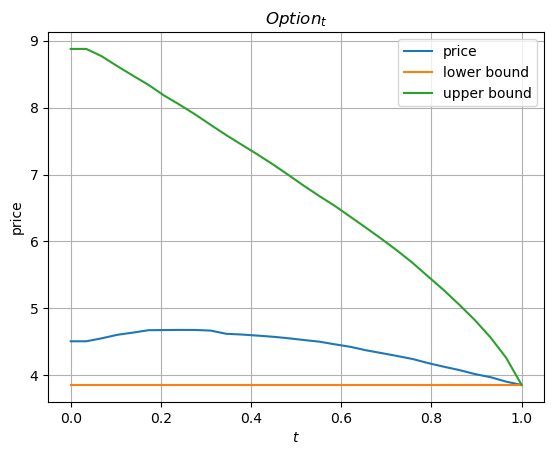

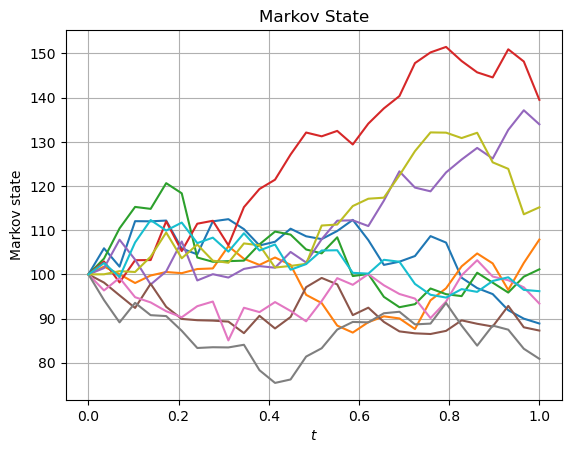

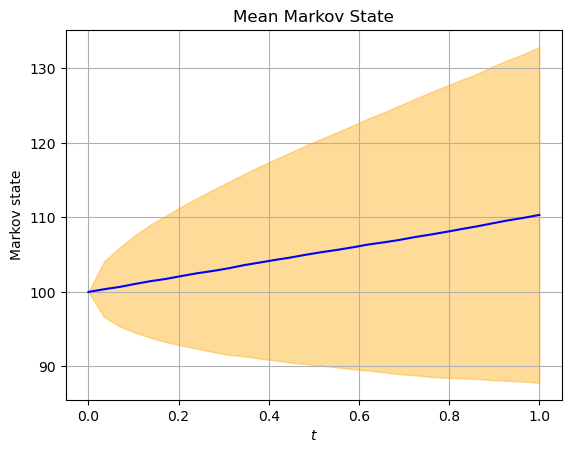

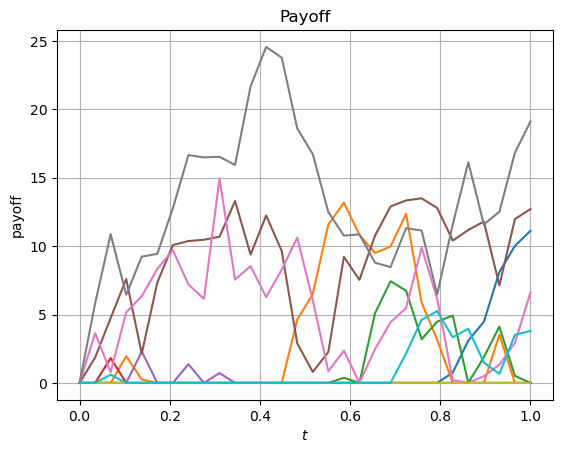

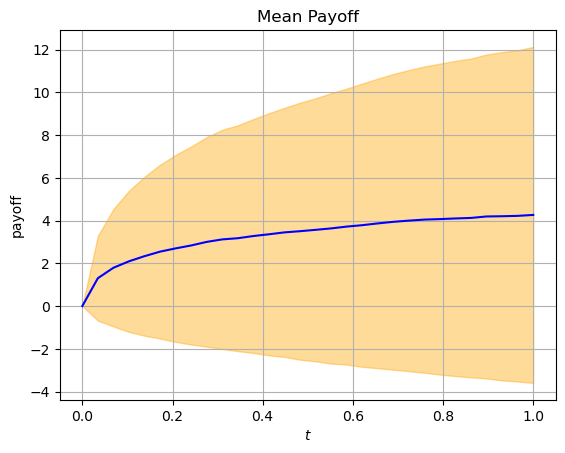

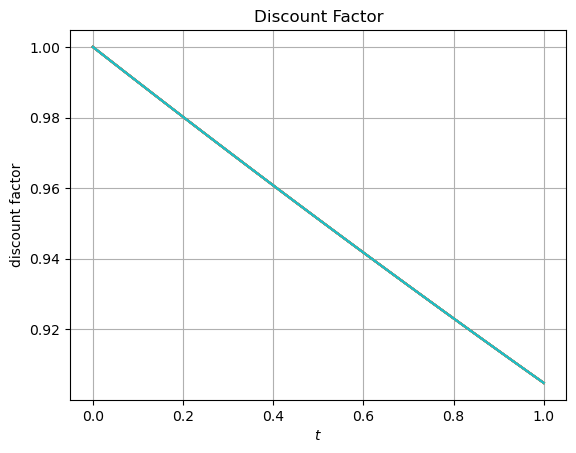

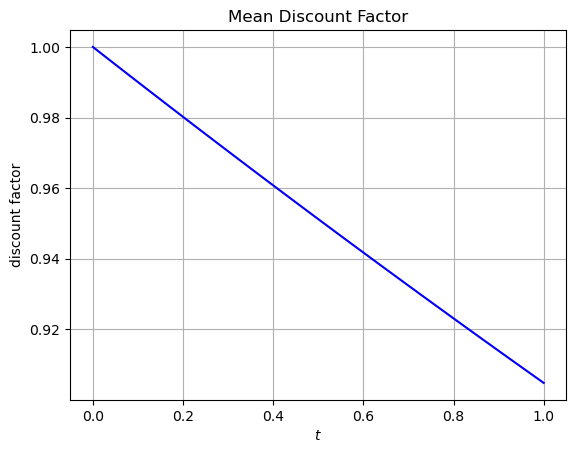

{'train': {'price': 4.509678548840923,
  'upper_bound': 8.875309427992246,
  'lower_bound': 3.8581060001876453,
  'std': 4.581186758905249}}

In [8]:

amc.price(
    test=False,
    quiet=False
)

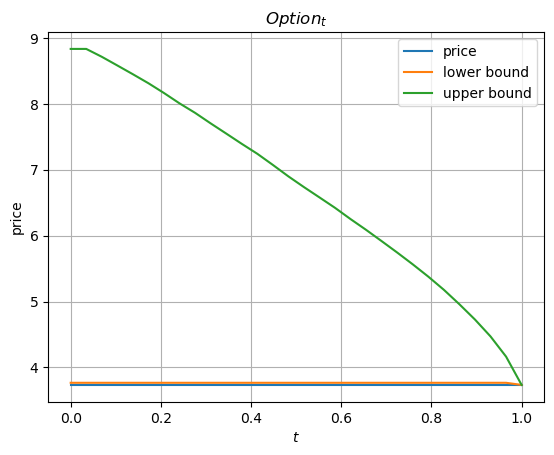

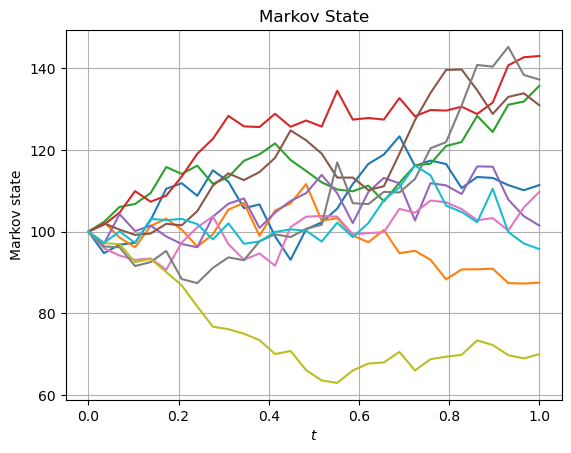

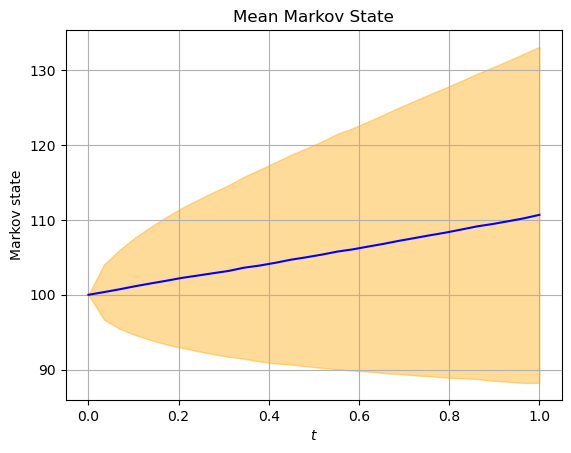

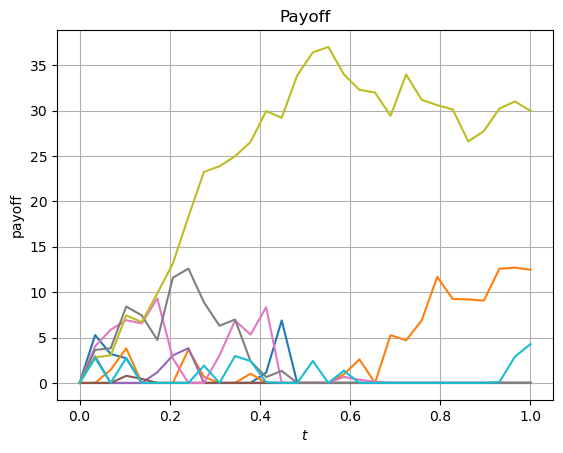

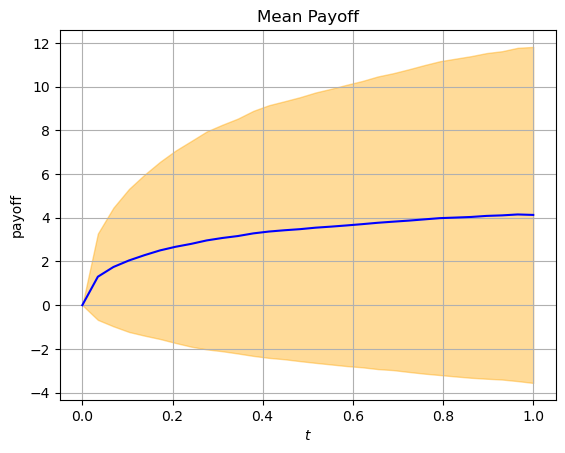

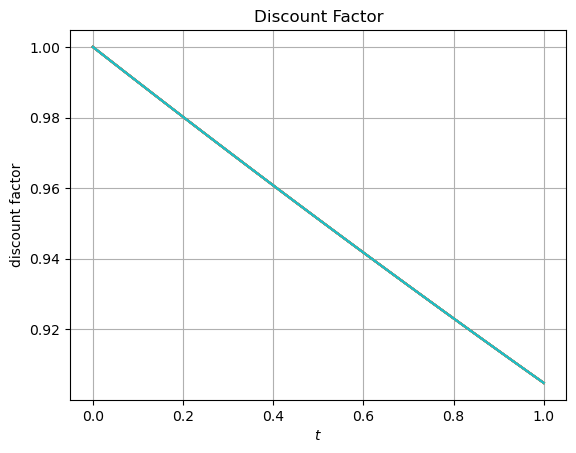

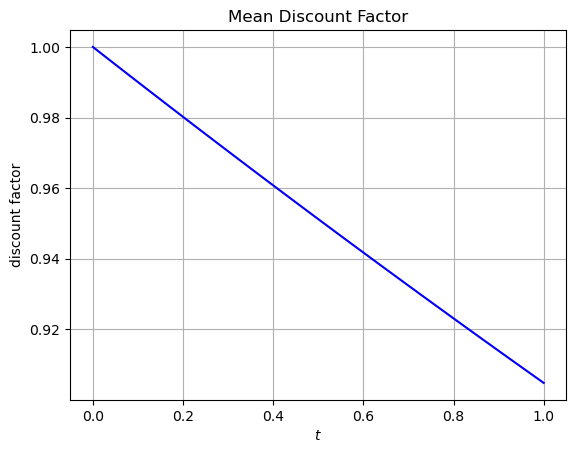

{'train': {'price': 4.509678548840923,
  'upper_bound': 8.875309427992246,
  'lower_bound': 3.8581060001876453,
  'std': 4.581186758905249},
 'test': {'price': 3.735350986336852,
  'upper_bound': 8.833022164725996,
  'lower_bound': 3.767706822837842,
  'std': 6.9535858683675515}}

In [11]:
amc.price(
    test=True,
    quiet=False
)